# Day 15: PyTorch Training Loop

Welcome to Day 15!

Today you will learn:
- How to write a full training loop in PyTorch
- Use built-in optimizers instead of manual weight updates
- Track loss over epochs
- Train a simple network from scratch

If you found this notebook helpful, your <b style="color:red;">UPVOTE</b> would be greatly appreciated! It helps others discover the work and supports continuous improvement.

---

# Import Necessary Libraries

In [1]:
import torch                    # PyTorch core library for tensor operations
import torch.nn as nn           # PyTorch module containing neural network building blocks (layers, loss functions, etc.)
import torch.optim as optim     # PyTorch module for optimization algorithms (SGD, Adam, etc.)
import matplotlib.pyplot as plt # Library for creating plots and visualizations

# Dataset

In [2]:
# Input: 1 sample, 2 features
X = torch.tensor([[1.0, 2.0]])  

# Target
y = torch.tensor([[1.0]])       


# Define Model

In [3]:
class SingleNeuron(nn.Module):
    def __init__(self):
        super().__init__()
        # Linear layer: 2 inputs → 1 output
        self.linear = nn.Linear(2, 1)
    
    def forward(self, x):
        # Forward pass with sigmoid activation
        return torch.sigmoid(self.linear(x))

# Initialize model
model = SingleNeuron()
print(model)


SingleNeuron(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


# Loss Function & Optimizer

In [4]:
criterion = nn.MSELoss()                          # Mean Squared Error for regression
lr = 0.1
optimizer = optim.SGD(model.parameters(), lr=lr)  # Stochastic Gradient Descent

# Trainning Loop

In [5]:
epochs = 50
loss_history = []

for epoch in range(epochs):
   
    # Forward Pass
    output = model(X)          
    
    # Compute loss
    loss = criterion(output, y)
    loss_history.append(loss.item())
    
    # Backward Pass
    optimizer.zero_grad()      # Reset gradients
    loss.backward()            # Compute gradients
    
    # Parameter Update
    optimizer.step()           # Update weights
    
    # Print every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.4494
Epoch 10, Loss: 0.1081
Epoch 20, Loss: 0.0435
Epoch 30, Loss: 0.0253
Epoch 40, Loss: 0.0174


# Loss Curve

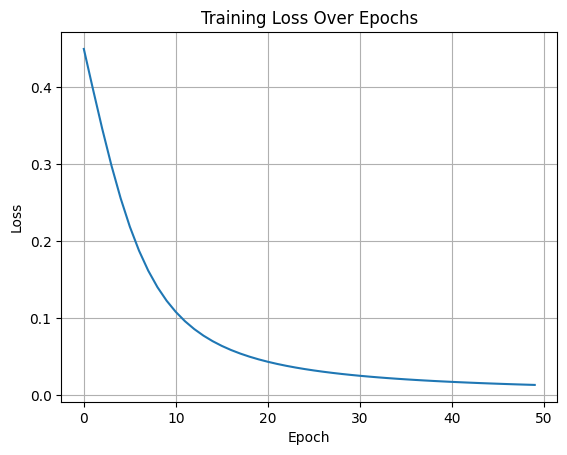

In [6]:
plt.figure()
plt.plot(loss_history)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")

plt.grid(True)
plt.show()


# Final Prediction

In [7]:
final_output = model(X)
print("Final prediction:", final_output.item())
print("Target:", y.item())


Final prediction: 0.8853347897529602
Target: 1.0


# Key Takeaways from Day 15

- Training loop = Forward → Loss → Backward → Optimizer step
- Using 1 sample with 2 features is standard in PyTorch
- Optimizer handles gradient-based updates automatically
- Loss curve shows model convergence
- Understanding this loop is mandatory before moving to multi-layer networks

---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>
